# Pandas统计分析入门（4）
- 转载注明转自：https://github.com/liupengyuan/
- ## Visualization基础

In [1]:
%matplotlib inline
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
#import seaborn as sns    #即使不适用seaborn内的功能，也可以使绘图自动带有seaborn风格

In [2]:
# df = pd.read_excel('https://github.com/liupengyuan/python_tutorial/blob/master/chapter4/countrys_freq.xlsx?raw=true')
df = pd.read_excel('countrys_freq.xlsx')
df

,美国,日本,德国
2007,1000,500,300
2008,1500,900,400
2009,1200,800,350
2010,1700,1000,500
2011,1400,800,400
2012,1800,1200,450
2013,1000,300,350
2014,1200,350,300
2015,1300,500,400
2016,2000,700,800


- 利用read_excel()函数读入一个表格

### 1. pandas定制绘图初步

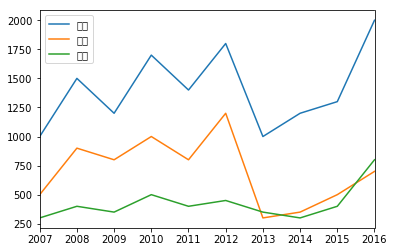

In [3]:
df.plot()

- 直接利用plot()绘图。该图的左上角图例处，显示中文有些问题

In [4]:
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['FangSong'] # 指定默认字体  plt.rcParams['font.sans-serif'] = ['FangSong'] 前者为全局影响，后者影响当前
# mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题  plt.rcParams['axes.unicode_minus'] = False

- 为正确显示中文，在程序头部加入以上代码(windows平台)

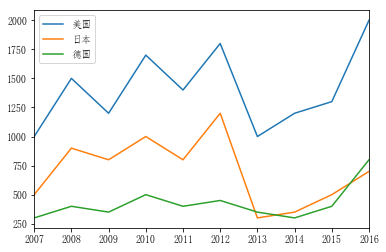

In [5]:
df.plot()

- 再次绘制图形，中文被正确显示

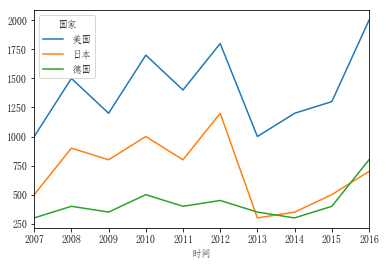

In [6]:
df.index.name = '时间'
df.columns.name = '国家'
df.plot()

- 为df的index及columns设置name后的效果。index的name显示为x坐标轴的名称。由于是多列，columns的name显示为图例名称

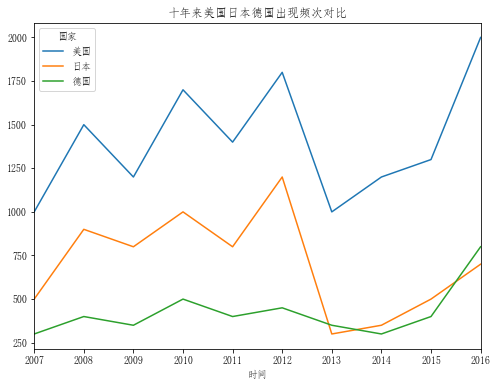

In [7]:
df.plot(title = '十年来美国日本德国出现频次对比',figsize=(8,6))

- 利用title参数，为图加上标题
- 利用figsize参数，调整图大小

- pandas内置的plot()函数还有很多参数，详细使用可参考http://pandas.pydata.org/pandas-docs/stable/visualization.html
- 一般的图形可视化，用pandas内置的plot函数已经足够，如果需要进一步定义，则可以利用matplotlib

In [8]:
plt.style.available

['bmh',
 'classic',
 'dark_background',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn']

利用plt.style.available，查看目前可用的风格类型

In [9]:
# plt.style.use("ggplot") 

使用ggplot风格

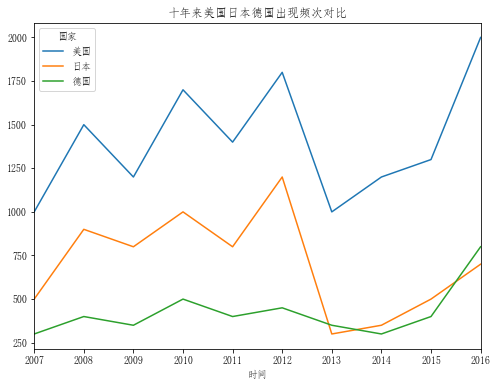

In [10]:
df.plot(title = '十年来美国日本德国出现频次对比',figsize=(8,6))

### 2. matplotlib绘图基础
将pandas绘图与matplotlib绘图结合可以很方便的定制可视化实例。这里先介绍matplotlib基础

Matplotlib is an excellent 2D and 3D graphics library for generating scientific figures.

仅介绍matplotblib最基础的使用，matplotlib绘图的进一步详细使用，可参考官方网站文档，特别是http://matplotlib.org/users/pyplot_tutorial.html

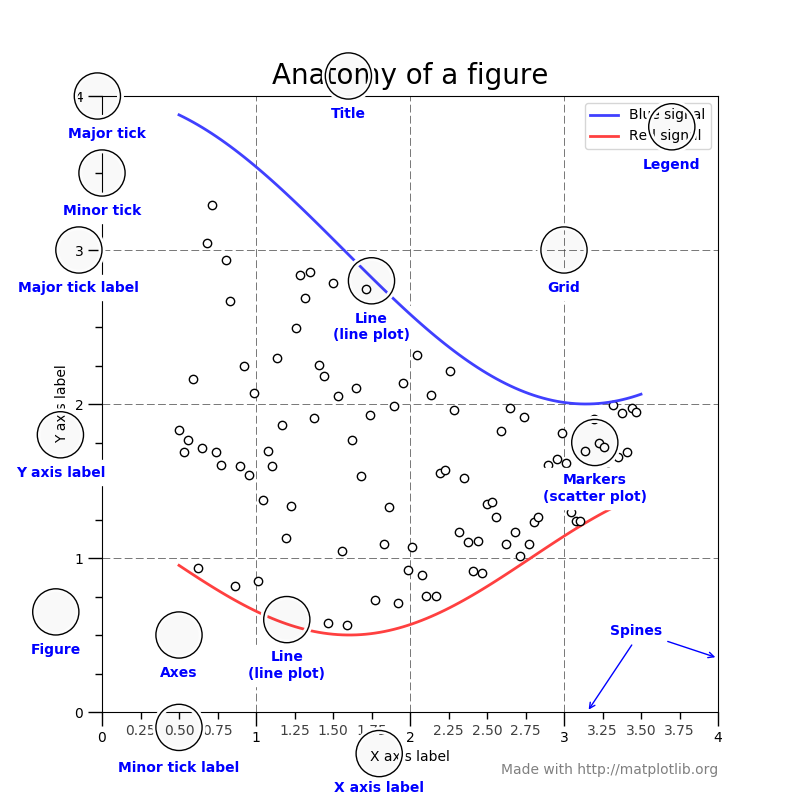

In [11]:
from IPython.core.display import Image, display
display(Image(filename='figures/anatomy1.png', width=800))

**1. 概念与布局**

In [12]:
x = np.linspace(0, 5, 10)
y = x ** 2

数据

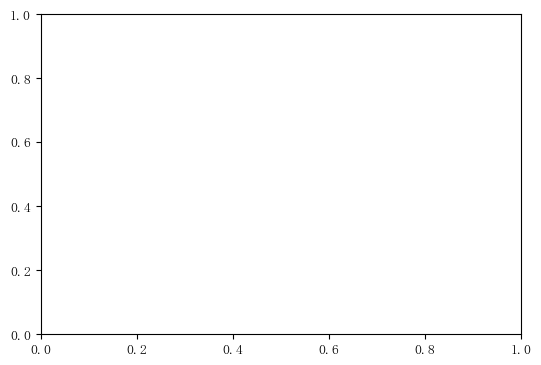

In [13]:
# 创建一个图形画布
fig = plt.figure(figsize = (6,4), dpi=100)    
# 创建一个坐标轴(axes)并设置图形大小比例
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # 坐标轴图形大小：左，下，右（宽），上（高） (0到1，表示比例位置)

- 利用figure()函数，创建了一个画布对象，并赋值给fig，接下来的绘图将基于这个画布对象fig
- 利用figure()函数中的figsize参数，设置了画布大小，如果不设置大小，默认为(6,4)inch
- 利用figure()函数中的dpi参数，设置分辨率为100，即dot per inch，除非需要很高分辨率，一般情况可以不用设置这个参数
- 图形不能直接绘制在画布对象fig上，而是先要建立一个坐标系axes
- 由于仅仅建立了一个画布对象fig以及坐标系axes，因此是空的图

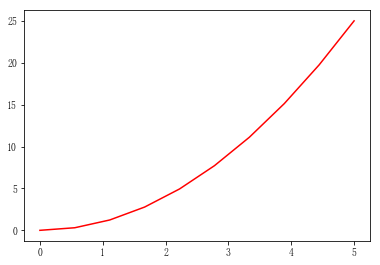

In [14]:
fig = plt.figure()    
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])

axes.plot(x, y, 'r')

- 在axes内利用plot()函数画线，其中x,y均为序列或者array类型，一一对应。
- 在axes内利用set()函数及set函数的变形，加x,y轴标签及抬头

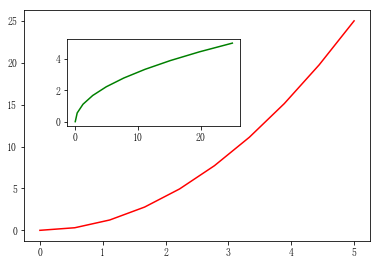

In [15]:
fig = plt.figure()

axes1 = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # 第一个坐标轴    
axes2 = fig.add_axes([0.2, 0.5, 0.4, 0.3]) # 第二个坐标轴

# 第一个坐标轴下作图
axes1.plot(x, y, 'r')

# 第二个坐标轴下作图
axes2.plot(y, x, 'g')

- 可以利用add_axed()函数，在同一个figure中，加入多个坐标轴，多个坐标轴可以独立绘图

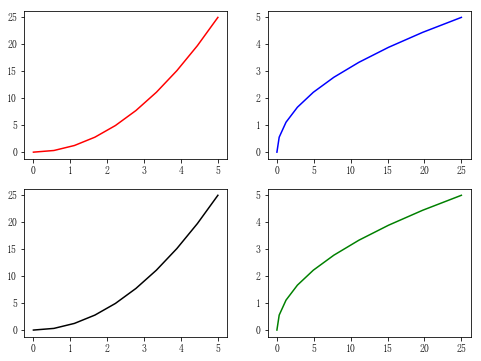

In [16]:
fig = plt.figure(figsize=(8,6))    
ax1 = fig.add_subplot(2,2,1)
ax1.plot(x,y,'r')
ax2 = fig.add_subplot(2,2,2)
ax2.plot(y,x,'b')
ax3 = fig.add_subplot(2,2,3)
ax3.plot(x,y,'k')
ax4 = fig.add_subplot(2,2,4)
ax4.plot(y,x,'g')

- 建立一个画布对象，大小为(8,6)
- 利用add_subplot()方法，对画布fig进行分区，并加入子图，每个子图单独一个坐标系，画布的分区类似于一个2维数组
- 三个数字依次为：2行，2列，从左上角开始数，第几个图形
- 可以在子图中分别进行绘图

axes type is<class 'numpy.ndarray'>, shape is (2, 2).


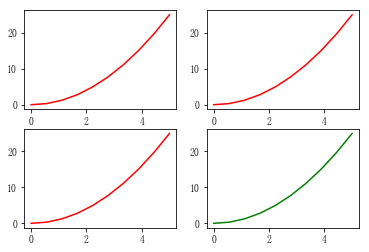

In [17]:
fig, axes = plt.subplots(nrows=2, ncols=2)   # axes 是ndarray类型 里面是2*2个axes对象
print('axes type is{}, shape is {}.'.format(type(axes), axes.shape))

for ax in axes.flatten()[:3]:
    ax.plot(x, y, 'r')

axes[1][1].plot(x, y, 'g')

- 利用plt.subplots()函数，定义1个figure，以及1或者多个子图
- 1或者多个子图返回在一个ndarray.array中，本例存入axes变量中
- 可以利用循环依次取出各个子图，并分别绘图，也可以利用下标取出进行绘图

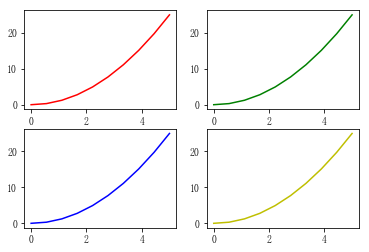

In [18]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)   # axes 是ndarray类型 里面是2*2个axes对象

ax1.plot(x, y, 'r')
ax2.plot(x, y, 'g')
ax3.plot(x, y, 'b')
ax4.plot(x, y, 'y')

也可以按照数组元素的顺序，依次取出

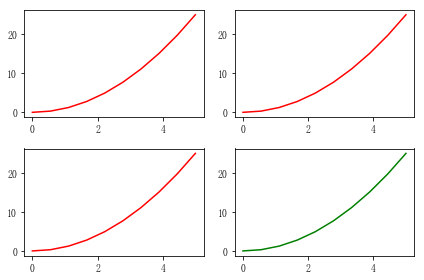

In [19]:
fig, axes = plt.subplots(nrows=2, ncols=2) 

for ax in axes.flatten()[:3]:
    ax.plot(x, y, 'r')

axes[1][1].plot(x, y, 'g')

fig.tight_layout()

用figure对象的tight_layout()方法可解决轴有重叠的问题，这个方法会自动地调节图形的位置

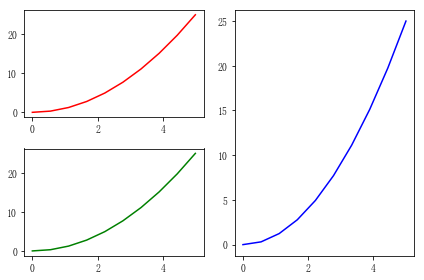

In [20]:
fig = plt.figure()

ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(223)
ax3 = fig.add_subplot(1,2,2)

ax1.plot(x, x**2, 'r')
ax2.plot(x, x**2, 'g')
ax3.plot(x, x**2, 'b')

plt.tight_layout()

- 加入三个子图，前两个是2行2列的第1，第3个位置；以及一个1行2列，第二个位置的子图
- add_subplot()方法内的参数可以用逗号分隔，也可以省略

**2. 图例、标签及标题(Legends, labels and titles)**

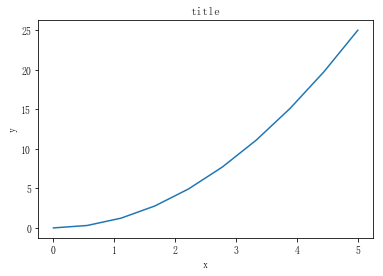

In [21]:
fig, ax = plt.subplots()
ax.plot(x,x**2)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('title')
# ax.set(xlabel='xx', ylabel='yy', title='title');   #与上面三个等价

利用set_xlabel(), ax.set_ylabel(), ax.set_title()这三个函数来设置x轴标签，y轴标签，图表抬头(标题)

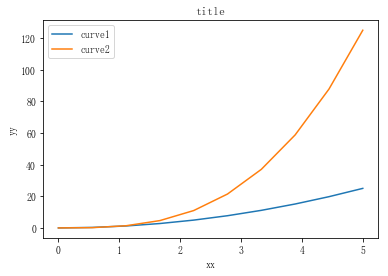

In [22]:
fig, ax = plt.subplots()
ax.plot(x, x**2)
ax.plot(x, x**3)
ax.legend(('curve1', 'curve2'))
ax.set(xlabel='xx', ylabel='yy', title='title');

利用legend()函数，由一个列表或元组，将图例文字传入

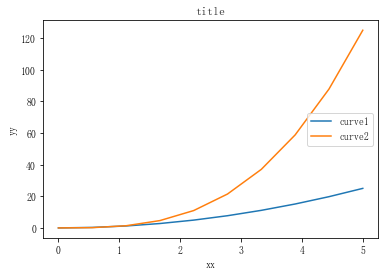

In [23]:
fig, ax = plt.subplots()
ax.plot(x, x**2, label="curve1")
ax.plot(x, x**3, label="curve2")
ax.legend(loc=5)
ax.set(xlabel='xx', ylabel='yy', title='title');

- 也可以利用plot()的label参数，设置对应图例信息
- 用legend()函数，将图例信息显示，同时还可以利用loc参数，设定图例显示位置，默认为loc=0
- ax.legend(loc=0) # let matplotlib decide the optimal location
- ax.legend(loc=1) # upper right corner
- ax.legend(loc=2) # upper left corner
- ax.legend(loc=3) # lower left corner
- ax.legend(loc=4) # lower right corner
- 有关legend位置，可参见：http://matplotlib.org/users/legend_guide.html#legend-location

**3. 字体**

In [24]:
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['FangSong']

如果要显示汉字，则与前一样需要设置全局参数中的字体

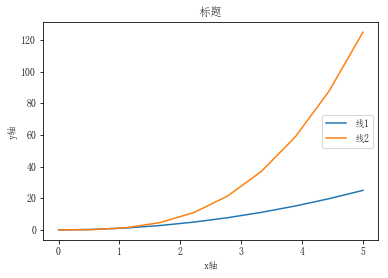

In [25]:
fig, ax = plt.subplots()
ax.plot(x, x**2, label="线1")
ax.plot(x, x**3, label="线2")
ax.legend(loc=5)
ax.set(xlabel='x轴', ylabel='y轴', title='标题');

显示中文与之前的设置一样（windows平台）

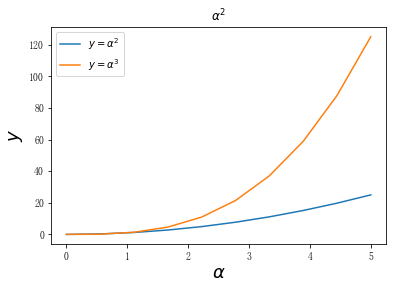

In [26]:
fig, ax = plt.subplots()

ax.plot(x, x**2, label=r"$y = \alpha^2$")
ax.plot(x, x**3, label=r"$y = \alpha^3$")
ax.legend()
ax.set_xlabel(r'$\alpha$', fontsize=18)
ax.set_ylabel(r'$y$', fontsize=18)
ax.set_title(r"$\alpha^2$");

- 利用fontsize参数，可设置字体大小
- 可以利用latex公式生成各类标题／标签
- latex公式的一个简易基础教程可参见：https://github.com/liupengyuan/python_tutorial/tree/master/chapter5

In [27]:
# Update the matplotlib configuration parameters:
plt.rcParams.update({'font.size': 16, 'font.family': 'serif'})

更新字体设置

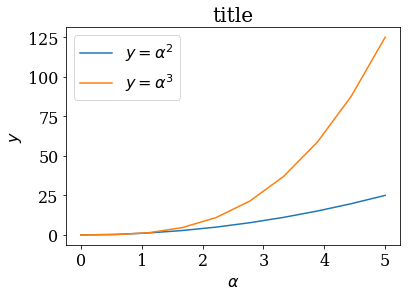

In [28]:
fig, ax = plt.subplots()

ax.plot(x, x**2, label=r"$y = \alpha^2$")
ax.plot(x, x**3, label=r"$y = \alpha^3$")
ax.legend(loc=2) # upper left corner
ax.set_xlabel(r'$\alpha$')
ax.set_ylabel(r'$y$')
ax.set_title('title', fontsize = 20);

全局设置下，仍然可以对各个标签等字体进行单独设置

**4. 颜色，线型(linetypes)，线宽(linewidths)**

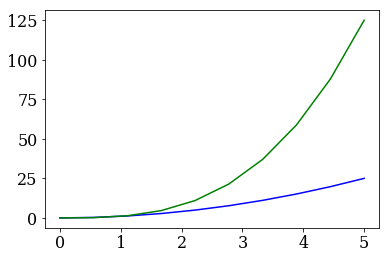

In [29]:
fig, ax = plt.subplots()
ax.plot(x, x**2, color = 'blue') # blue line
ax.plot(x, x**3, 'g') # green line

- 可以在plot()函数中，设置color参数
- color参数关键字也可以省略，值也可以简写，如green简写为g，blue可以简写为b

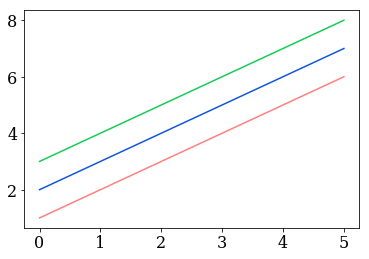

In [30]:
fig, ax = plt.subplots()

ax.plot(x, x+1, color="red", alpha=0.5) # 红色，半透明
ax.plot(x, x+2, color="#1155dd")        # RGB值，对应红绿蓝，dd最大，因此颜色偏蓝
line = ax.plot(x, x+3, color="#15cc55")        # 偏绿

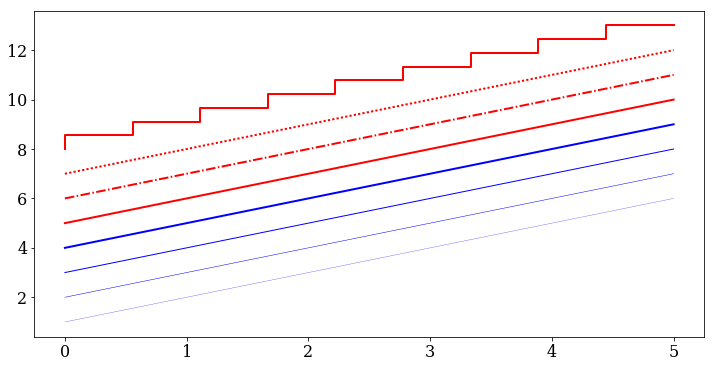

In [31]:
fig, ax = plt.subplots(figsize=(12,6))

# 线宽
ax.plot(x, x+1, color="blue", linewidth=0.25)
ax.plot(x, x+2, color="blue", linewidth=0.50)
ax.plot(x, x+3, color="blue", linewidth=1.00)
ax.plot(x, x+4, color="blue", linewidth=2.00)

# 线型 ‘-‘, ‘--’, ‘-.’, ‘:’, ‘steps’
ax.plot(x, x+5, color="red", lw=2, linestyle='-')
ax.plot(x, x+6, color="red", lw=2, ls='-.')
ax.plot(x, x+7, color="red", lw=2, ls=':')
ax.plot(x, x+8, "r", lw=2, ls='steps')

参数：linewidth, linestyle，可以简写为：lw, ls。用于设置线宽及线型

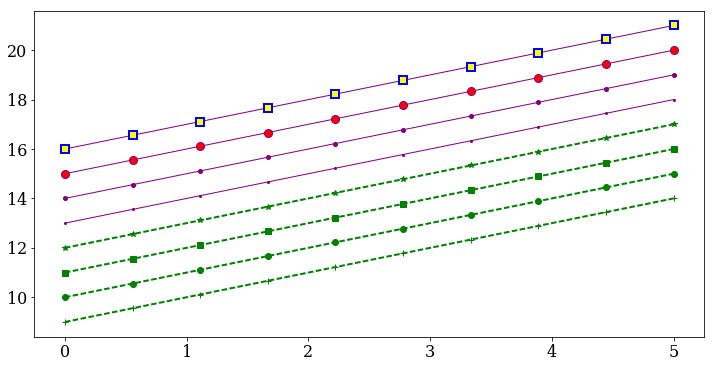

In [32]:
fig, ax = plt.subplots(figsize=(12,6))
# 标记符号: marker = '+', 'o', '*', 's', ',', '.', '1', '2', '3', '4', ...
ax.plot(x, x+ 9, color="green", lw=2, ls='--', marker='+')
ax.plot(x, x+10, color="green", lw=2, ls='--', marker='o')
ax.plot(x, x+11, color="green", lw=2, ls='--', marker='s')
ax.plot(x, x+12, color="green", lw=2, ls='--', marker='*')

# 标记符号
ax.plot(x, x+13, color="purple", lw=1, ls='-', marker='o', markersize=2)
ax.plot(x, x+14, color="purple", lw=1, ls='-', marker='o', markersize=4)
ax.plot(x, x+15, color="purple", lw=1, ls='-', marker='o', markersize=8, markerfacecolor="red")
ax.plot(x, x+16, color="purple", lw=1, ls='-', marker='s', markersize=8, 
        markerfacecolor="yellow", markeredgewidth=2, markeredgecolor="blue");

- 参数marker可设置标记的符号
- 还可以设置marker自身的颜色，框线宽，框线颜色

<class 'list'> 1


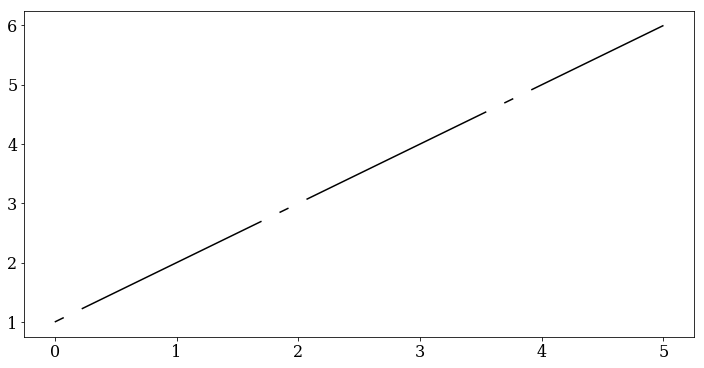

In [33]:
fig, ax = plt.subplots(figsize=(12,6))

line = ax.plot(x, x+1, color="black", lw=1.50)
print(type(line), len(line))
line[0].set_dashes([5, 10, 100, 10]) # 格式: 线长度，空白长度，线长度，空白长度...

还可以利用set_dashes()函数，设置dashes线的具体形式

**5. 控制坐标轴(axis)**

In [34]:
plt.rcParams.update({'font.size': 16, 'font.family': 'FangSong'})

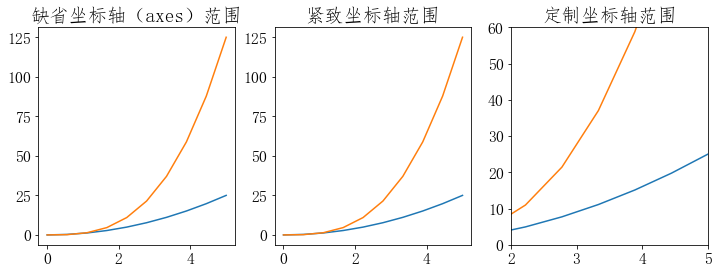

In [35]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

axes[0].plot(x, x**2, x, x**3)
axes[0].set_title("缺省坐标轴（axes）范围")

axes[1].plot(x, x**2, x, x**3)
axes[1].axis('tight')
axes[1].set_title("紧致坐标轴范围")

axes[2].plot(x, x**2, x, x**3)
axes[2].set_ylim([0, 60])
axes[2].set_xlim([2, 5])
axes[2].set_title("定制坐标轴范围");

- 利用axis('tight')，可讲坐标轴范围设置为紧致(tight)，这也正是缺省时的设置
- 还可以利用set_xlim()，set_ylim()函数，设定坐标的起点终点

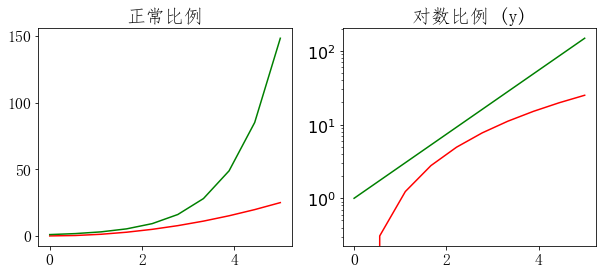

In [36]:
fig, axes = plt.subplots(1, 2, figsize=(10,4))
      
axes[0].plot(x, x**2,'r', x, np.exp(x), 'g')
axes[0].set_title("正常比例")

axes[1].plot(x, x**2, 'r', x, np.exp(x), 'g')
axes[1].set_yscale("log")
axes[1].set_title("对数比例 (y)");

- 利用set_yscale('log')可以将y轴设为对数比例绘图，即画出x, log(y)的图形
- set_xscale('log')设x轴

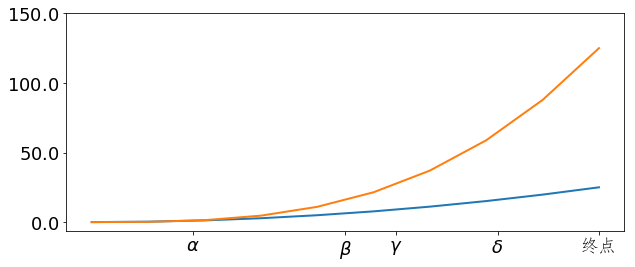

In [37]:
fig, ax = plt.subplots(figsize=(10, 4))

ax.plot(x, x**2, x, x**3, lw=2)

#设置x轴记号(tick)位置
ax.set_xticks([1, 2.5, 3, 4, 5])

#每个记号标签
ax.set_xticklabels([r'$\alpha$', r'$\beta$', r'$\gamma$', r'$\delta$', '终点'], fontsize=18)

#设置y轴记号(tick)位置
yticks = [0, 50, 100, 150] 
ax.set_yticks(yticks)

ax.set_yticklabels(["${:.1f}$".format(y) for y in yticks], fontsize=18); 

- 利用set_xticks(...)设置x轴记号位置，参数是一个序列，代表各个记号的坐标
- 利用set_xticklabels(...)设置x轴记号标签，参数是一个序列，与上面的序列对应
- 类似的有set_yticks(), set_yticklabels()，进行y轴设置

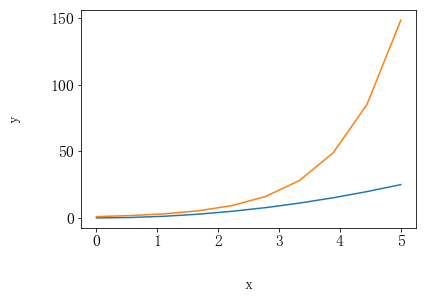

In [38]:
fig, ax = plt.subplots(1, 1)      
ax.plot(x, x**2, x, np.exp(x))

# 标签与坐标数字之间的距离
ax.xaxis.labelpad = 30
ax.yaxis.labelpad = 30

ax.set_xlabel("x")
ax.set_ylabel("y")

# 坐标轴与坐标数字之间的距离设置，并不常用，缺省为3
# plt.rcParams['xtick.major.pad'] = 15
# plt.rcParams['ytick.major.pad'] = 15

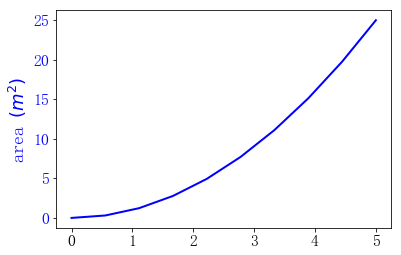

In [39]:
fig, ax = plt.subplots()

ax.plot(x, x**2, lw=2, color="blue")
ax.set_ylabel(r"area $(m^2)$", fontsize=18, color="blue")
for label in ax.get_yticklabels():
    label.set_color("blue")

- 可以利用子图的get_yticklabels()方法，取得所有y轴的标签的表，其中每一个标签是一个matplotlib的Text对象
- 利用Text对象的set_color()方法，可以设置y轴标签的颜色（含数字）

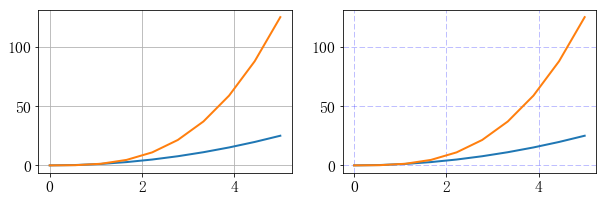

In [40]:
fig, axes = plt.subplots(1, 2, figsize=(10,3))

#设置网格
axes[0].plot(x, x**2, x, x**3, lw=2)
axes[0].grid()   #grid(True)

#对网格进行定制
axes[1].plot(x, x**2, x, x**3, lw=2)
axes[1].grid(color='b', alpha=0.5, linestyle='--', linewidth=0.5)

- 利用grid()打开网格
- 也可以直接利用grid()函数，对网格线进行设置，参数与之前对线的设置类似，grid()函数进一步设置，请参考官方文档

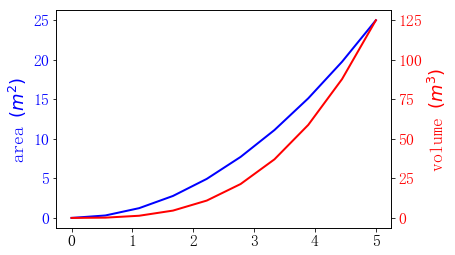

In [41]:
fig, ax1 = plt.subplots()

ax1.plot(x, x**2, lw=2, color="blue")
ax1.set_ylabel(r"area $(m^2)$", fontsize=18, color="blue")
for label in ax1.get_yticklabels():
    label.set_color("blue")
    
ax2 = ax1.twinx()

ax2.plot(x, x**3, lw=2, color="red")
ax2.set_ylabel(r"volume $(m^3)$", fontsize=18, color="red")
for label in ax2.get_yticklabels():
    label.set_color("red")

- 利用子图的twinx()函数，可以得到相同x轴，而y轴在另一侧的子图，子图其他设置相同
- twinxy()函数用法类似

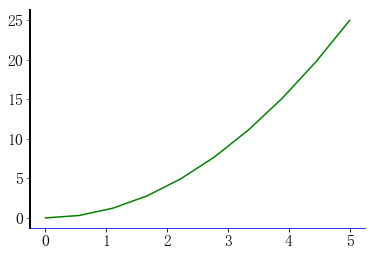

In [42]:
fig, ax = plt.subplots()

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('b')
ax.spines['left'].set_linewidth(2)
ax.plot(x,x**2,'g')

- 子图坐标系的脊线，上下左右分别为spines['top']，spines['bottom']，spines['left']，spines['right']
- 应用脊线的set_color()方法，可以进行线的颜色设置，当颜色设置为'none'时，则该脊线不显示
- 应用脊线的set_linewidth()方法，可以进行线宽设置，当线宽为0时，该脊线不显示

In [43]:
mpl.rcParams['axes.unicode_minus'] = False

解决图像中负号'-'有时显示或保存为方块的问题

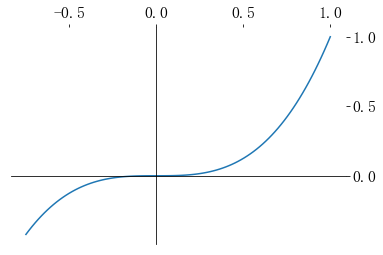

In [44]:
fig, ax = plt.subplots()

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.xaxis.set_ticks_position('top')
ax.spines['bottom'].set_position(('data',0)) # set position of x spine to x=0

ax.yaxis.set_ticks_position('right')
ax.spines['left'].set_position(('data',0))   # set position of y spine to y=0

xx = np.linspace(-0.75, 1., 100)
ax.plot(xx, xx**3);

- 利用子图的xaxis.set_ticks_position()方法，可以设定x轴的标签及数字在top或bottom
- 利用子图的yaxis.set_ticks_position()方法，可以设定y轴的标签及数字在left或right
- 利用脊线的set_position()方法，可以将脊线放置在特定的点，参数为一个元组，内有两个参数
- 第一个参数'data'即数据，第二个参数是坐标。('data',0)就是酱该脊线放在数据为0处

**6. 其他**

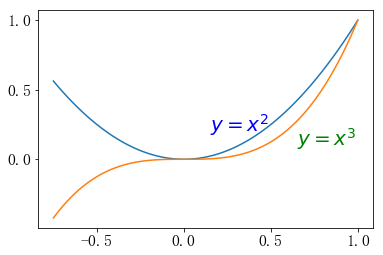

In [45]:
fig, ax = plt.subplots()

ax.plot(xx, xx**2, xx, xx**3)

ax.text(x=0.15, y=0.2, s=r"$y=x^2$", fontsize=20, color="blue")
ax.text(0.65, 0.1, r"$y=x^3$", fontsize=20, color="green");

- 用子图的text()方法，可以在子图中写入文字，x,y参数为文字坐标，s参数为字符串内容。

In [46]:
n = np.array([0,1,2,3,4,5])
t = np.linspace(0, 2 * np.pi, 100)

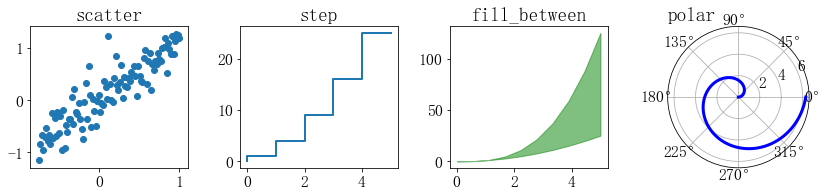

In [47]:
fig = plt.figure(figsize = (12,3))

ax0 = fig.add_subplot(1,4,1)
ax0.scatter(xx, xx + 0.25*np.random.randn(len(xx)))
ax0.set_title("scatter")

ax1 = fig.add_subplot(1,4,2)
ax1.step(n, n**2, lw=2)
ax1.set_title("step")

# axes[2].bar(n, n**2, align="center", width=0.5, alpha=0.5)
# axes[2].set_title("bar")

ax2 = fig.add_subplot(1,4,3)
ax2.fill_between(x, x**2, x**3, color="green", alpha=0.5)
ax2.set_title("fill_between")

ax3 = fig.add_subplot(1,4,4, polar = True)
ax3.plot(t, t, color='blue', lw=3)
ax3.set_title("polar", loc='left')

plt.tight_layout()

还可以绘制各种图形

In [48]:
fig.savefig("test.png")
fig.savefig('test.pdf')

- 利用figure对象的savefig()方法保存文件在当前目录下
- 可保存成多种格式的文件如：png,pdf,jpg等

In [49]:
fig.savefig("test.png", dpi = 300)

- 利用参数dpi设置图像分辨率

### 3. matplotlib与pandas联合绘图基础

In [50]:
df

国家,美国,日本,德国
时间,,,
2007,1000,500,300
2008,1500,900,400
2009,1200,800,350
2010,1700,1000,500
2011,1400,800,400
2012,1800,1200,450
2013,1000,300,350
2014,1200,350,300
2015,1300,500,400


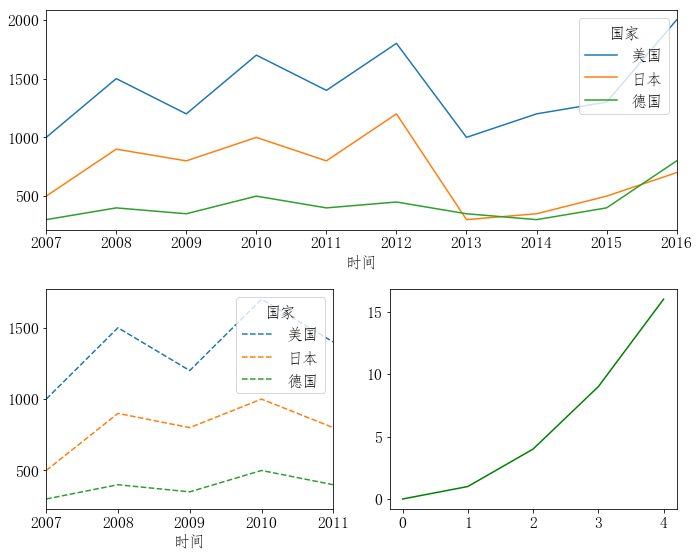

In [51]:
x = np.arange(5)
fig = plt.figure(figsize = (10,8))

ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(223)
ax3 = fig.add_subplot(224)


df.plot(ax = ax1)
df.iloc[:5].plot(ax = ax2, ls='--')
ax3.plot(x, x**2, 'g')

plt.tight_layout()

参考资料：
* http://www.matplotlib.org
* http://github.com/jrjohansson/scientific-python-lectures